In [18]:
import numpy
import pandas
from pandas import concat

#linear regression calculation
from scipy import stats

#Import sampling helper
from sklearn.model_selection import train_test_split
#Import preprocessing modules
from sklearn import preprocessing
#Import random forest model
from sklearn.ensemble import RandomForestRegressor
#Import logist regression model
from sklearn.linear_model import LogisticRegression
#Import Linear regression model
from sklearn.linear_model import LinearRegression

#Import cross-validation pipelinePython
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

#Import evaluation metricsPython
from sklearn.metrics import mean_squared_error, r2_score

#Import module for saving scikit-learn modelsPython
import joblib

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

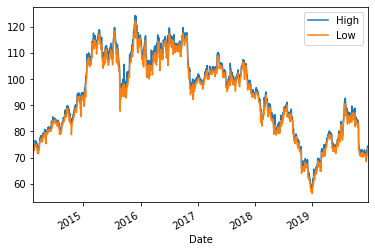

In [4]:
ABInbevQuandl = pandas.read_csv('https://www.quandl.com/api/v3/datasets/EURONEXT/ABI.csv?api_key=_czXMKeX32eTXGttzD8H',
                                parse_dates=[0],
                                index_col=[0])
ABInbevQuandl.sort_index(inplace=True)
ABInbevQuandl[['High','Low']].plot()

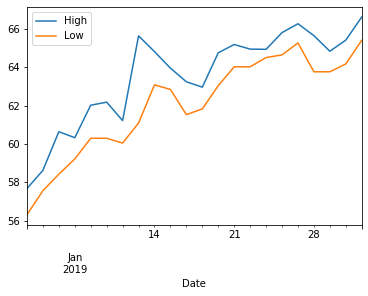

In [5]:
#Retrieve only the value for Jan 2019 (order of the value in the set is important for the selection)
ABJan = ABInbevQuandl.loc['2019-01-01':'2019-01-31']
ABJan[['High','Low']].plot()


In [6]:
ABJan.reset_index(inplace=True)


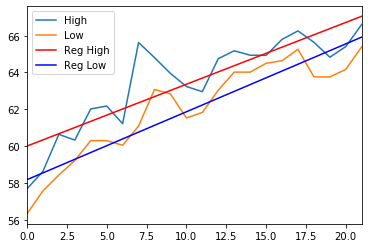

In [16]:
slope_high, intercept_high, r_value, p_value, std_err_high = stats.linregress(ABJan.index,ABJan['High'])
slope_low, intercept_low, r_value, p_value, std_err_low = stats.linregress(ABJan.index,ABJan['Low'])
plt=ABJan[['High','Low']].plot()

plt.plot(ABJan.index, intercept_high + slope_high*ABJan.index, 'r', label='Reg High')
plt.plot(ABJan.index, intercept_low + slope_low*ABJan.index, 'b', label='Reg Low')
plt.legend()



Coef: [[0.33579898]
 [0.36881423]]
Intercept [60.00320158 58.17881423]
Score 0.8063257140907121


C:\Users\pierr\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


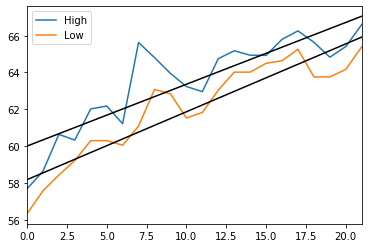

In [68]:
X = numpy.array(ABJan.index).reshape(-1,1)
y = numpy.array(ABJan[['High','Low']])
LinearReg = LinearRegression().fit(X,y)
y_reg=LinearReg.predict(X)
plt= ABJan[['High','Low']].plot()
plt.plot(X, y_reg, color ='k')
print("Coef:", LinearReg.coef_)
print("Intercept", LinearReg.intercept_)
print("Score", LinearReg.score(X,y))

  
